##### 로지스틱 회귀
```
공부한 시간 데이터를 보고 합격여부를 예측
공부시간에 비례해서 점수를 부여
공부 1시간에 10점을 부여
--> 선형 방정식

합격점수(z) = w *(공부시간) + b
w(가중치) : 중요도 1시간당 점수 (10점)
b(편향) : 기본점수(-50, 5시간은 공부해야 0점)

문제점 : 합격점수에 해당하는 100점이 나올 수도 있지만 -200점이 나올 수도 있음..
분류를 하려면 즉, 합격/불합격 판단... 우리가 원하는 것은 방정식의 값으로 확률을 계산(0~100%)
```

##### 점수를 확률로 바꿔야한다.(시그모이드 함수) 0 ~ 1 사이의 값으로 변경
```
합격확률 = 시그모이드(z) = 1 / 1 + e^-z
합격점수가 높으면 1에 가깝고
낮으면 0에 가깝다.

합격점수가 0이면 정확히 0.5(50%) - 임계치/임계값이라고 한다.
```
##### 비용함수(손실함수) : 모델이 얼마나 틀렸는지 측정, 로지스틱은 로그함수를 사용
```
합격(정답=1)
모델이 99% 합격예측 --> 벌점은 거의 0점
모델이 1% 합격예측 --> 벌점은 크게(무한대에 가깝게)

불합격(정답 = 0)
모델이 1%로 합격을 예측 -> 잘 맞춤 벌점이 거의 0점
모델이 99%로 합격을 예측 -> 완전 틀림 벌점을 아주 크게

log loss 원리
w, b를 찾음... 손실함수를 이용해서 비용이 가장 낮을 때
```

##### 비용이 최저인 값을 찾아나가는 과정 : 경사하강법

##### 과적합 : 너무 완벽한 모델..(학습에 대해서)
```
규제(Regularization) : 모델이 너무 복잡해지지 않도록 패널티 또는 단순함에 대한 보너스
L2 규제(Ridge) : w(중요도) 값이 너무 커지는 것을 막는다. 가중치(w) 제곱의 합을 벌점으로 추가한다
L1 규제(Lasso) : 어떤 특징이 별로 안중요할 것 같은.. 그냥 w(중요도) 그냥 0으로 만든다. 불필요한 특징을 제거하는 효과, 가중치들의 절대값의 합을 패널티로 추가
                -feature selector 역할도 겸함
```

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

clr = LogisticRegression(max_iter=10000)
clr.fit(x_train,y_train)
predict = clr.predict(x_test)
print(predict[:5],  y_test[:5])
predict_proba = clr.predict_proba(x_test)
predict_proba[:5]

In [1]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- 시각화 함수 (공통) ---
def plot_decision_boundary(model, X_orig, y_orig, poly_transformer, scaler_transformer, title, subplot_ax):
    """모델의 결정 경계를 그려주는 함수"""
    # 1. 그래프를 그릴 영역을 정의합니다.
    x_min, x_max = X_orig[:, 0].min() - 0.5, X_orig[:, 0].max() + 0.5
    y_min, y_max = X_orig[:, 1].min() - 0.5, X_orig[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 2. 그래프 영역의 모든 점들을 모델이 예측할 수 있도록 변환합니다.
    grid_poly = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_scaled = scaler_transformer.transform(grid_poly)

    # 3. 변환된 점들을 모델로 예측합니다.
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # 4. 결정 경계와 원본 데이터 포인트를 그립니다.
    subplot_ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    subplot_ax.scatter(X_orig[:, 0], X_orig[:, 1], c=y_orig, cmap=plt.cm.coolwarm, edgecolors='k')
    subplot_ax.set_title(title)
    subplot_ax.set_xlabel("Feature 1")
    subplot_ax.set_ylabel("Feature 2")


In [2]:
# 과적합을 임의로 만들어서 시각화
# 1. 규제 알고리즘을 적용
# 2. 모델을 경량화.. 모델의 복잡도를 높이는 요소를 제거
# 3. 추가 데이터를 투입해서 학습

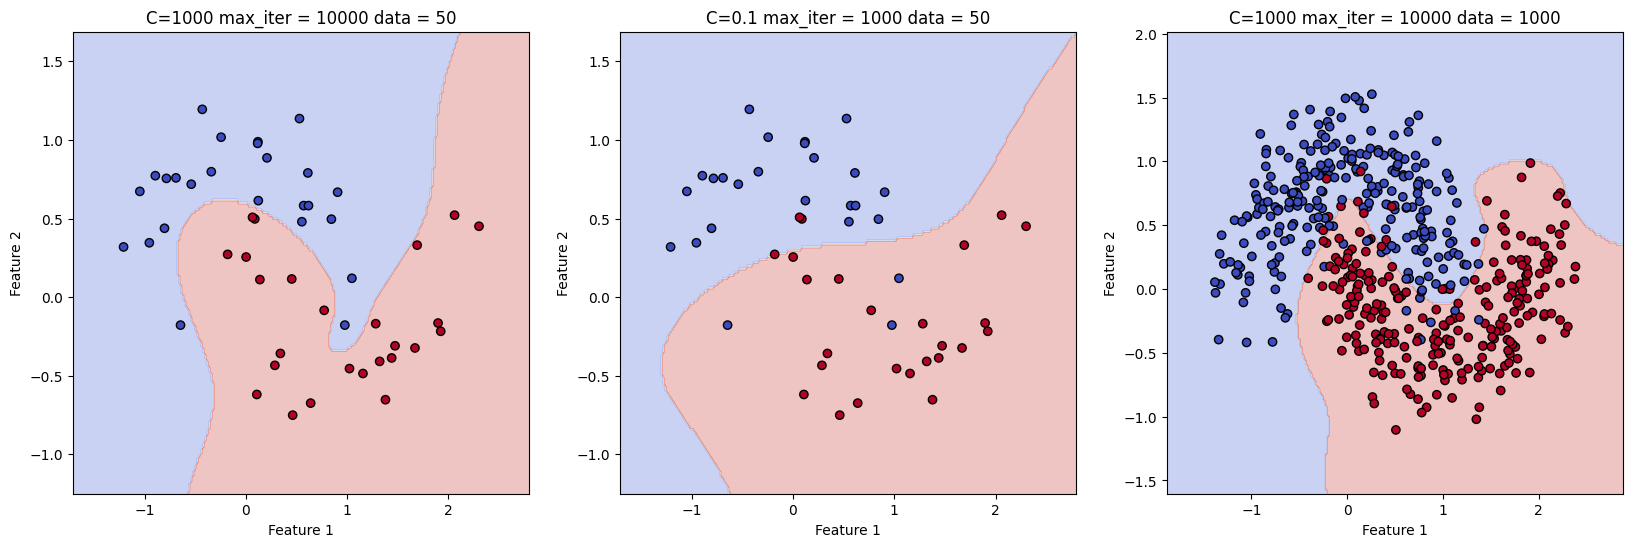

In [5]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
# 과접합 모델
X_small, y_small  = make_moons(n_samples= 50, noise=0.25,random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_small = poly.fit_transform(X_small)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_small = scaler.fit_transform(X_poly_small)
# 모델 훈련(데이터 50, 약한 규제)
log_reg_overfit = LogisticRegression(C=1000,max_iter=10000,random_state=45)  # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
log_reg_overfit.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_overfit, X_small, y_small,poly,scaler,'C=1000 max_iter = 10000 data = 50', axes[0])



# 규제 적용(데이터 50, 강한 규제)
log_reg_regulation = LogisticRegression(C=0.1,max_iter=1000,random_state=45) 
log_reg_regulation.fit(X_scaled_small, y_small)
plot_decision_boundary(log_reg_regulation, X_small, y_small,poly,scaler,'C=0.1 max_iter = 1000 data = 50', axes[1])



# 데이터를 추가(데이터 1000, 약하게)
X_large, y_large  = make_moons(n_samples= 500, noise=0.25,random_state=45)
# 고차항 특성으로 변환(과적합 유도)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_large = poly.fit_transform(X_large)
# 데이터 스케일링
scaler = StandardScaler()
X_scaled_large = scaler.fit_transform(X_poly_large)
# 모델 훈련(데이터 1000, 약한 규제)
log_reg_moredata = LogisticRegression(C=1000,max_iter=10000,random_state=45)  # C가 규제강도. 클수록 규제를 약하게  max_iter는 학습횟수
log_reg_moredata.fit(X_scaled_large, y_large)
plot_decision_boundary(log_reg_moredata, X_large, y_large,poly,scaler,'C=1000 max_iter = 10000 data = 1000', axes[2])

##### ROC, AUC
```
정확도 99% 하지만 데이터가 불균형이라면..문제가 달라진다 --> 좋은 척도가 못된다.
ROC, AUC 가 얼마나 안정적으로 좋은 성능을 내는지를 종합적으로 시각화
모델이 예측한 확률을 기반으로 분류기준점(Threshold)을 계속 변경해서 모델의 성능이 어떻게 변화하는지 하나의 곡선으로
```

##### ROC 구성요소 TPR FPR
```
혼동행렬(P:1, N:0) P:암환자, N:정상
TP: TRUE POSITIVE 진짜 암인 환자를 암이라고 예측
FN: FALSE NEGATIVE 진짜 암인 환자를 정상으로 예측
FP: FALSE POSITIVE 정상인 사람을 암이라고 예측
TN: TRUE NEGATIVE 정상인 사람을 정상이라고 예측

ROC 곡선의 X와 Y축
y축 : 진짜를 얼마나 잘 찾았나 TPR(True positive rate)
실제 양성인 데이터 중에서 모델이 양성으로 올바르게 예측한 비율
TPR : 민감도 또는 재현율
실제로 암인데 암이라고 예측 / 실제 모든 암 환자 수
TPR = TP / TP + FN

x축 : 가짜를 얼마나 잘못찾았나 ..FPR
FPR = FP(정상인데 암이라고 예측) / FP + TN(실제 모든 정상인수)
```

##### AUC (Area Under The Curve)
```
ROC 곡선 아래의 면적
1: 완벽한 모델 ROC가 좌측상단에 붙어있는 모양
0.5: 무작위로 찍는 것과 같은 즉 랜덤하게 예측하는 수준 ROC 대각선 직선
< 0.5 : 예측을 반대로.. 잘못된 모델
```

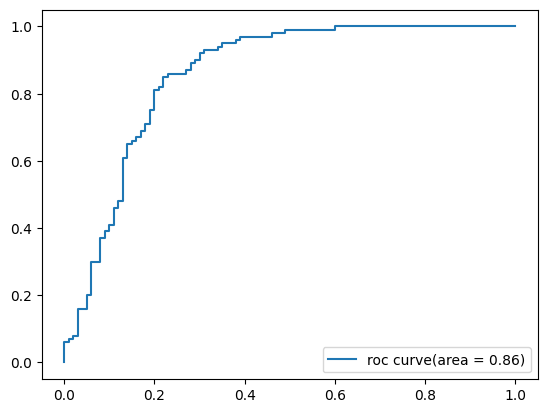

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.80      0.81      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
X,y = make_classification(n_samples=1000, n_features=20, n_informative=5,
                    n_redundant=0,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]  # 양성클래스의 확률

# ROC  AUC
# 실제값과 예측 확률을 사용 FPR  TPR
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_proba)
# fpr tpr 이용 auc를 계산
roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,label = f'roc curve(area = {roc_auc:.2f})')
plt.legend()
plt.show()

print(classification_report(y_test, model.predict(X_test)))